# **Problem Definition**

#### **1. Business/Research Problem**
The goal is to predict **Life Expectancy** of a country based on various socio-economic, health, and demographic indicators. Life expectancy is a critical measure of a country's overall well-being and can provide insights into health policies, resource allocation, and societal progress.

This problem is a **regression task**, where we aim to predict a continuous target variable (**Life Expectancy**) using features such as GDP, schooling, adult mortality, and others.

---

#### **2. Objective**
Build a machine learning model to:
1. **Accurately predict life expectancy** based on the provided features.
2. **Identify important factors** influencing life expectancy, which can guide policy-makers.

---

#### **3. Challenges**
- **Missing Data**: Many features have missing values, requiring imputation or handling.
- **Feature Scaling**: Numerical features vary greatly in scale and require normalization.
- **Feature Selection**: Some features may not contribute significantly to the target variable.
- **Imbalanced Data**: If the dataset is skewed toward certain ranges of life expectancy, it may affect model performance.

---

#### **4. Success Criteria**
The success of the model will be evaluated using:
1. **Mean Absolute Error (MAE)**: Measures the average magnitude of errors.
2. **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
3. **Root Mean Squared Error (RMSE)**: A metric in the same unit as the target variable.
4. **\(R^2\) Score**: Indicates the proportion of variance explained by the model.

A successful model should:
- Minimize MAE, MSE, and RMSE.
- Achieve an \(R^2\) score close to 1 on the validation and test datasets.


# **Data Collection**

#### **Data Source**
The dataset provided is a tabular dataset containing socio-economic, health, and demographic features for various countries over several years. The data is obtained from Kaggle.

[Dataset Link](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

---

#### **Relevance of Data**
The dataset is relevant to the problem domain as it includes features that directly or indirectly influence life expectancy, such as:
- **Health Indicators**: Immunization rates, HIV/AIDS impact, BMI.
- **Economic Indicators**: GDP, government expenditure on health.
- **Demographic Indicators**: Mortality rates, thinness percentages, schooling levels.

---

#### **Dataset Overview**
- **Total Entries**: 2938 rows.
- **Features**: 22 columns (e.g., Country, Year, Status, Life Expectancy, GDP, Schooling, etc.).
- **Target Variable**: **Life Expectancy** (a continuous numeric variable).
- **Feature Types**:
  - Categorical: Country, Status.
  - Numerical: GDP, Schooling, Alcohol, etc.
  - Yearly indicators: Trends over time for each country.

---

#### **Data Quality**
The dataset requires:
1. **Handling Missing Values**:
   - Some features (e.g., Hepatitis B, Population) have missing values, which need to be imputed.
2. **Feature Encoding**:
   - Categorical features like "Country" and "Status" must be converted to numerical values for model compatibility.
3. **Scaling**:
   - Numerical features (e.g., GDP, Percentage Expenditure) vary significantly in scale, requiring normalization.


# **Reading Dataset**

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Load the CSV file
csv_file_path = "/content/Life Expectancy Data.csv"
data = pd.read_csv(csv_file_path)

In [51]:
# Inspect the dataset
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

# **Data Exploration and Preparation**

### **Exploratory Data Analysis (EDA)**

In [52]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio

In [53]:
# Statistical summary
print(data.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

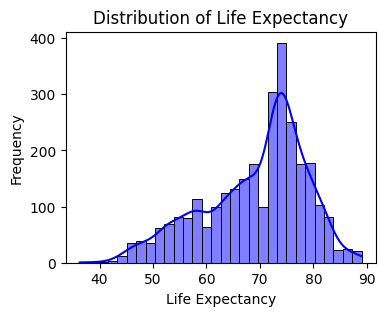

In [54]:
# Target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.histplot(data['Life expectancy '], kde=True, color='blue', bins=30)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

### **Data Cleaning**


In [55]:
# See missing values in the data
print("Missing Values Before Handling:")
print(data.isnull().sum())

Missing Values Before Handling:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [56]:
# Handling numerical values with missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handling categorical values with missing values
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

Index(['Country', 'Status'], dtype='object')


In [57]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [58]:
# See missing values in the data after handling them
print("Missing Values After Handling:")
print(data.isnull().sum())

Missing Values After Handling:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [59]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [60]:
# Remove duplicates if any
print(f"Data before removing duplicates: {data.shape}")
data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")

Data before removing duplicates: (2938, 22)
Data after removing duplicates: (2938, 22)


In [61]:
# Drop the 'Country' column from the dataset
data = data.drop(columns=['Country'])

# Verify the column has been dropped
print(data.head())

   Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0     0.01               71.279624         65.0      1154   19.1  ...    6.0   
1     0.01               73.523582         62.0       492   18.6  ...   58.0   
2     0.01               73.219243         64.0       430   18.1  ...   62.0   
3     0.01               78.184215         67.0      2787   17.6  ...   67.0   
4     0.01                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0       

### **Feature Engineering**

#### **Encoding Categorical Variables**

In [62]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder_status = LabelEncoder()
data['Status'] = label_encoder_status.fit_transform(data['Status'])

In [63]:
# Save the encoders to files
with open('label_encoder_status.pkl', 'wb') as file:
    pickle.dump(label_encoder_status, file)

print("Label encoders saved successfully!")

Label encoders saved successfully!


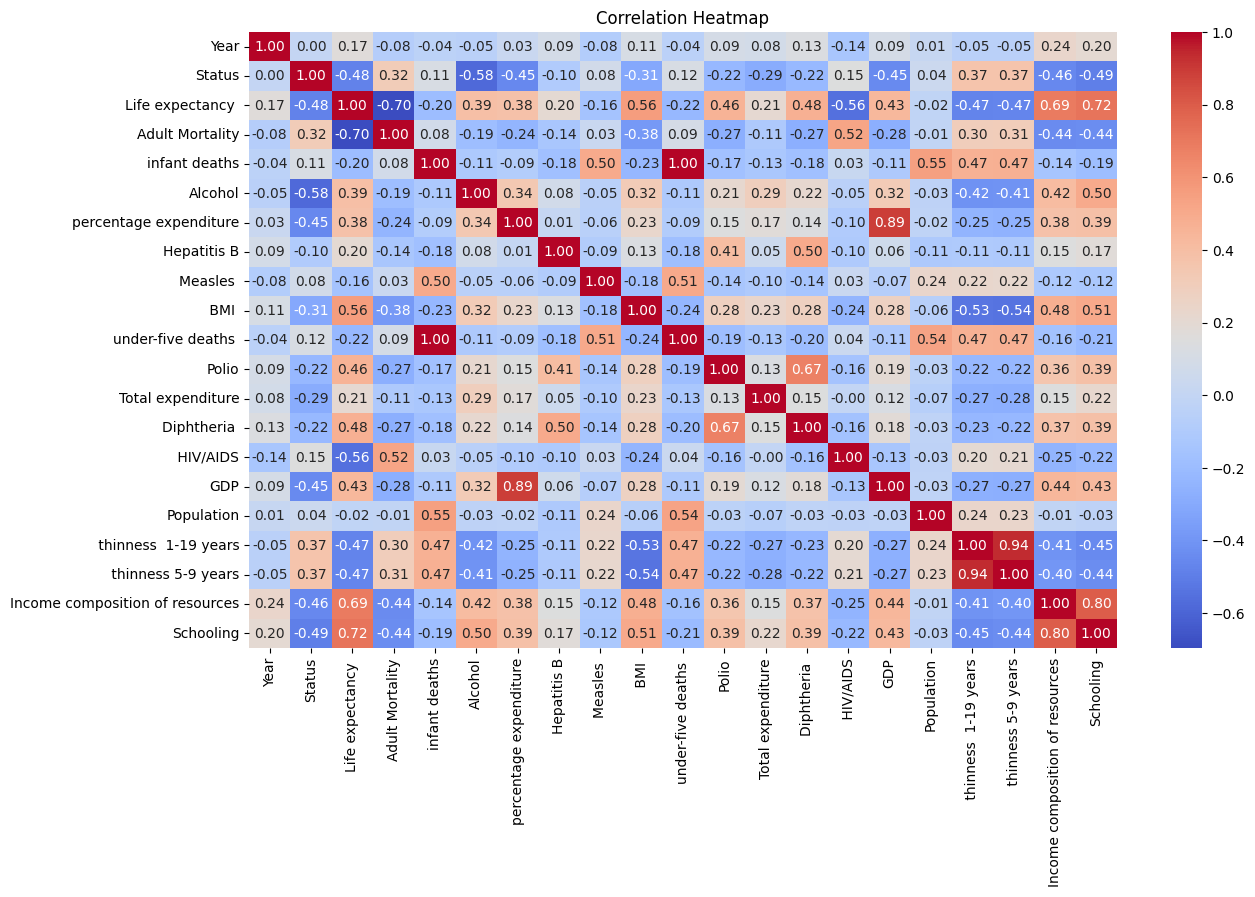

In [64]:
# Correlation heatmap
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-65-52ccf7056889>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',y=data[col],data=data,ax=axes[row_idx,col_idx],markers=True,ci=None)
<ipython-input-65-52ccf7056889>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',y=data[col],data=data,ax=axes[row_idx,col_idx],markers=True,ci=None)
<ipython-input-65-52ccf7056889>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',y=data[col],data=data,ax=axes[row_idx,col_idx],markers=True,ci=None)
<ipython-input-65-52ccf7056889>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',y=data[col],data=data,ax=axes[row_idx,col_idx],markers=True,ci=None)
<ipython-input-65-52ccf7056889>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the sa

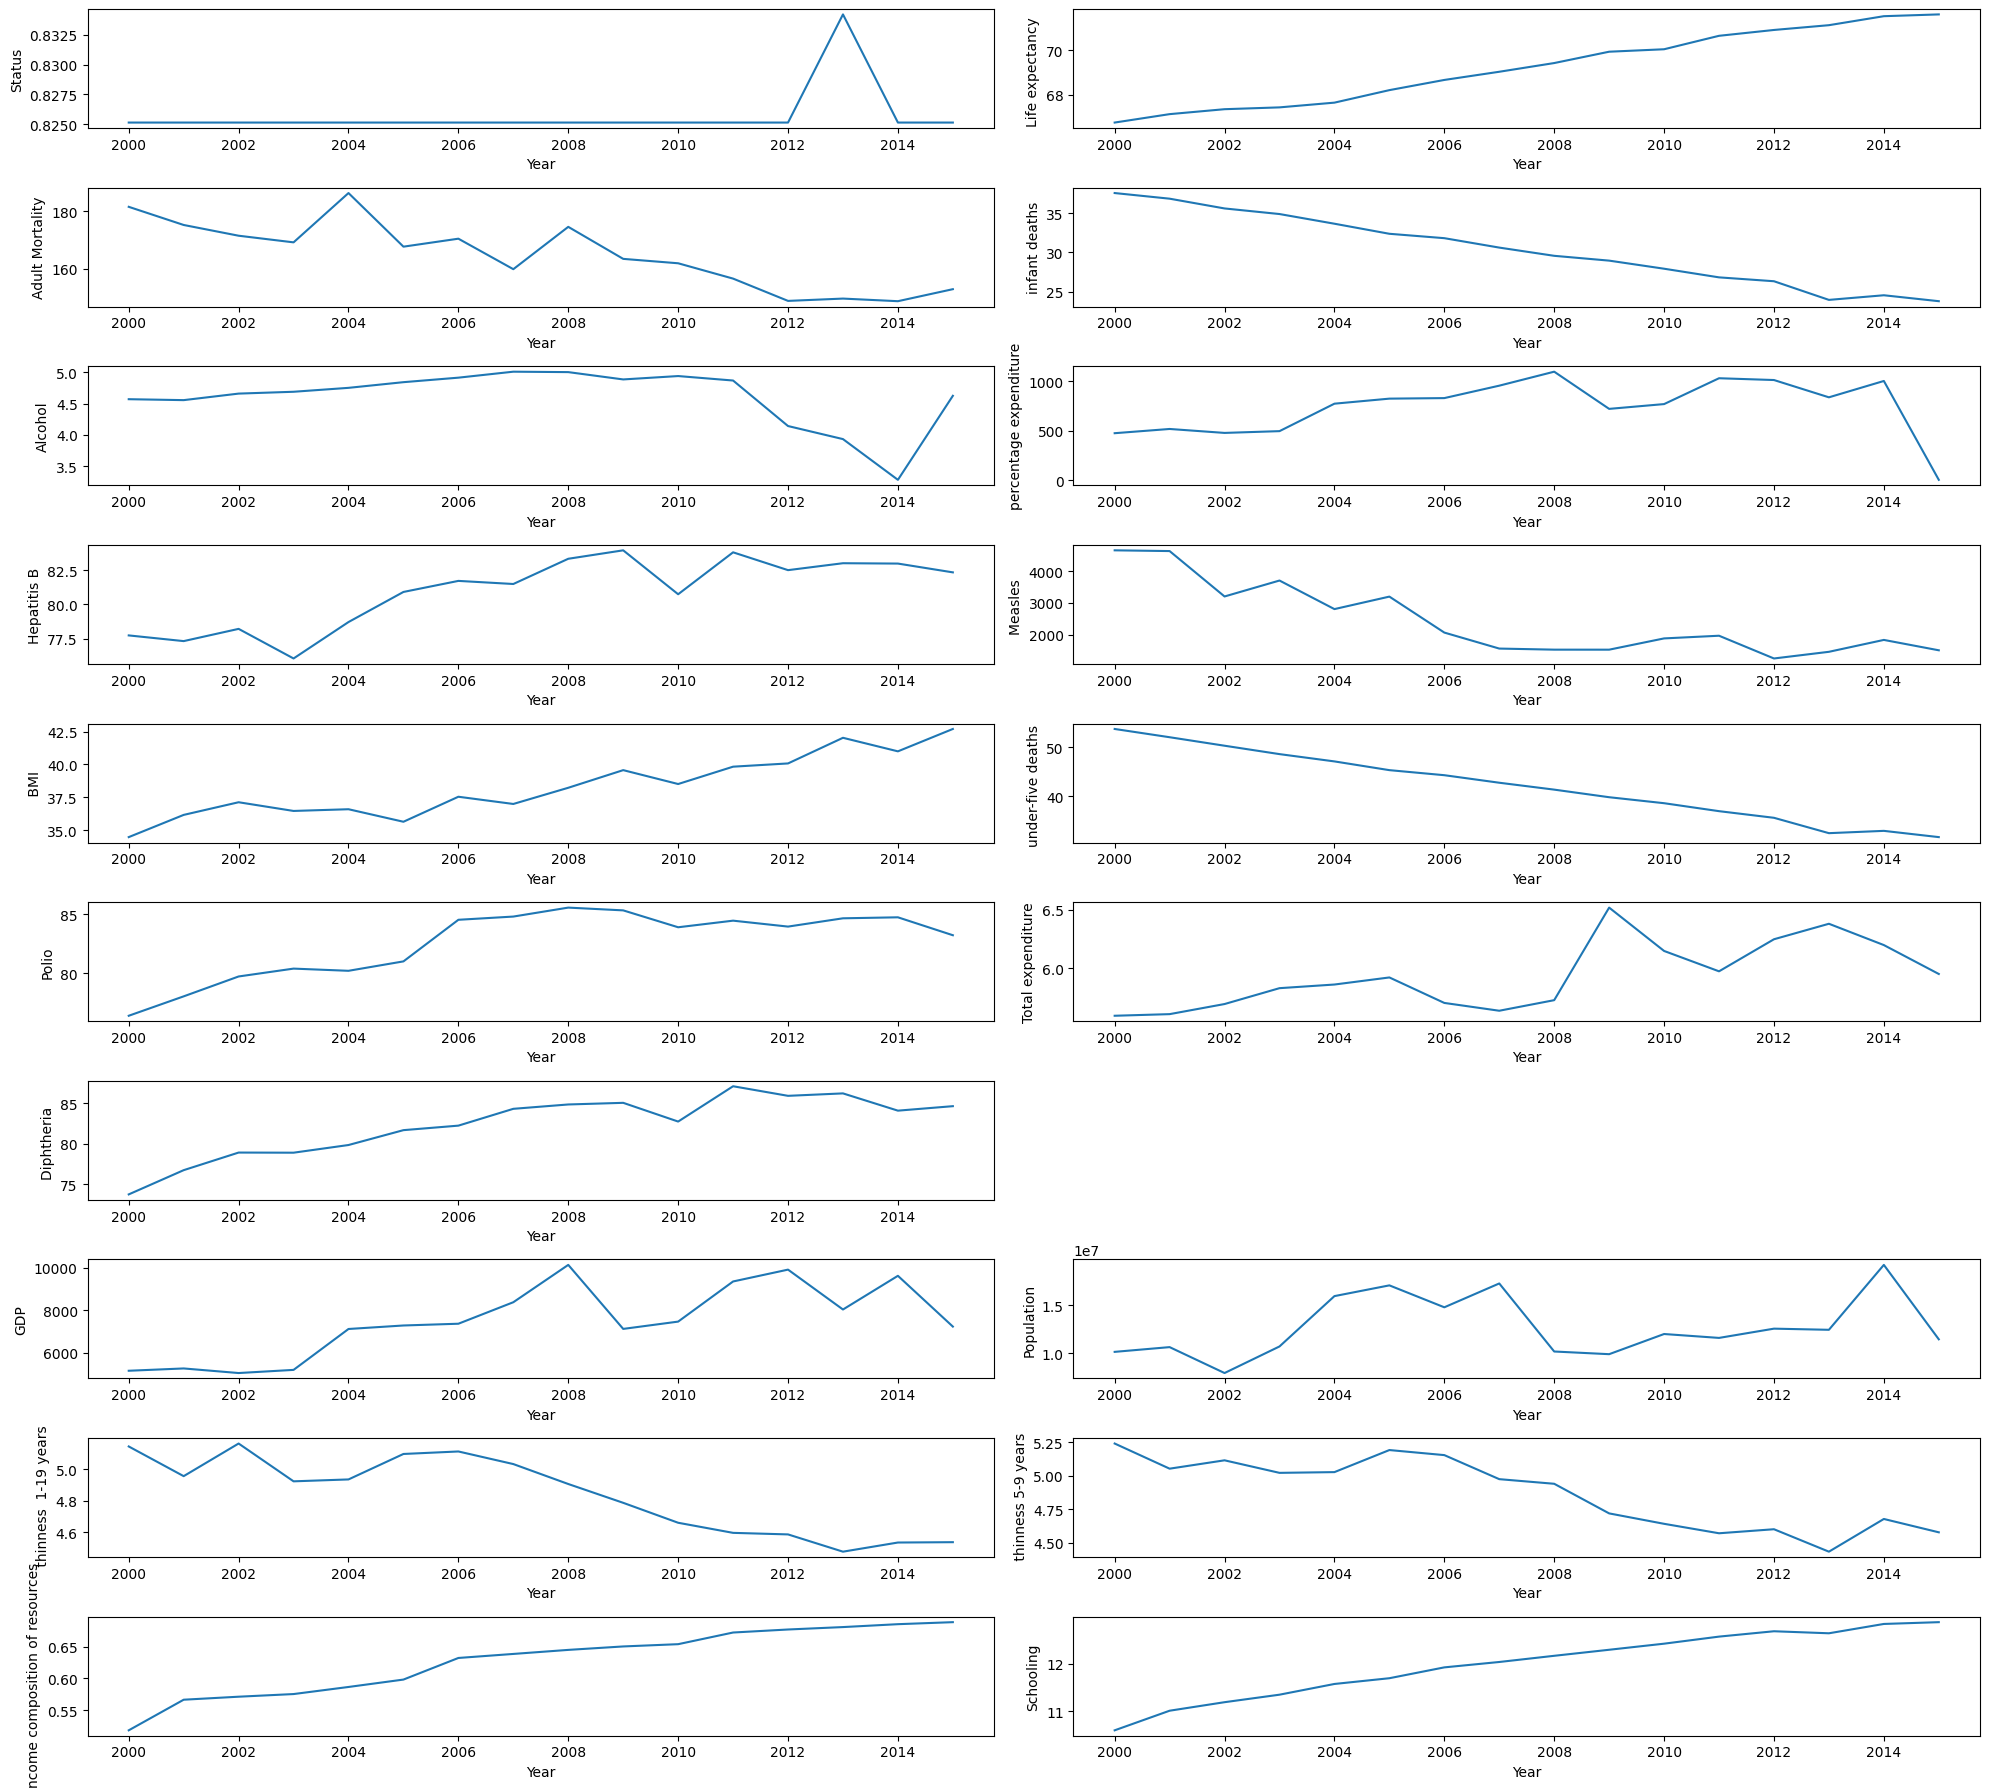

In [65]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=len(data.columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(data.drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=data[col],data=data,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[6,1])
plt.tight_layout()
plt.show()

In [66]:
data.drop(columns=[' thinness 5-9 years',' BMI ','infant deaths','Year'],inplace=True)

#### **Data Splitting**

In [67]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

In [68]:
# Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1997
Validation set size: 500
Test set size: 441


# **Some Useful Functions**

In [70]:
import pickle

def save_model(model, filename):
    # Save the trained model to a file.

    with open(filename, "wb") as model_file:
        pickle.dump(model, model_file)
    print(f"Model saved successfully to {filename}.")


In [71]:
def load_model(filename):

    # Load a model from a file.

    with open(filename, "rb") as model_file:
        model = pickle.load(model_file)
    print(f"Model loaded successfully from {filename}.")
    return model


In [72]:
def predict_with_model(model, X_data):

    # Use a trained model to make predictions on given data.
    predictions = model.predict(X_data)
    return predictions


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_data, y_true):

    # Use a trained model to make predictions and evaluate performance.

    # Make predictions
    predictions = model.predict(X_data)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)

    # Print the metrics
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")

    # Return the metrics as a dictionary
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }


# **Algorithm Selection**

Based on the problem definition and data characteristics, this is a regression problem (predicting a continuous target: Life Expectancy). The following algorithms are suitable for regression tasks:

#### **Algorithms used:**

**Linear Models:**

---

*Linear Regression*: A baseline model to establish initial performance.
Ridge and Lasso Regression: Handle multicollinearity and feature selection.

**Tree-Based Models:**

---

*Random Forest Regressor*: Handles non-linearity and captures interactions between features.

*Gradient Boosting Regressor*: Builds a strong model by iteratively improving weak learners.

**Support Vector Machines:**

---

*SVR (Support Vector Regression)*: Works well for medium-sized datasets and can capture non-linear relationships.

**Computational Cost and Interpretability**

*Linear Regression:* Low computational cost, high interpretability.

*Random Forest*: Medium computational cost, limited interpretability.

*Gradient Boosting:* Higher computational cost, excellent performance in many cases.

*SVR*: Moderate interpretability, computational cost depends on the kernel and dataset size.

# **Model Development and Training**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import pickle

#### **Linear Regression**

In [75]:
# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Save the trained model
save_model(linear_reg, "linear_regression_model.pkl")


Model saved successfully to linear_regression_model.pkl.


In [76]:
# Load the saved model
loaded_linear_regression_model = load_model("linear_regression_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_linear_regression = evaluate_model(loaded_linear_regression_model, X_val, y_val)

print("\nEvaluate the model on the test set")
test_metrics_linear_regression = evaluate_model(loaded_linear_regression_model, X_test, y_test)


Model loaded successfully from linear_regression_model.pkl.

Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 3.16194221698096
Mean Squared Error (MSE): 17.415002050374763
Root Mean Squared Error (RMSE): 4.173128568637056
R² Score: 0.8120339292371865

Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 3.0684214449971945
Mean Squared Error (MSE): 17.789689039300107
Root Mean Squared Error (RMSE): 4.217782478898136
R² Score: 0.7999572775520618


#### **Random Forest Regressor**

In [77]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Save the trained model
save_model(rf_model, "random_forest_model.pkl")


Model saved successfully to random_forest_model.pkl.


In [78]:
# Load the saved model
loaded_rf_model = load_model("random_forest_model.pkl")

print("Evaluate the model on the validation set")
val_metrics_rf = evaluate_model(loaded_rf_model, X_val, y_val)

print("Evaluate the model on the test set")
test_metrics_rf = evaluate_model(loaded_rf_model, X_test, y_test)


Model loaded successfully from random_forest_model.pkl.
Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.2101792267759557
Mean Squared Error (MSE): 3.7419194014527513
Root Mean Squared Error (RMSE): 1.9344041463594808
R² Score: 0.9596121846573612
Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.104926306952651
Mean Squared Error (MSE): 3.0747090639090486
Root Mean Squared Error (RMSE): 1.75348483423982
R² Score: 0.9654252994236758


#### **Hyperparameter Tuning for Random Forest Regressor**


We’ll use GridSearchCV to find the best combination of hyperparameters for the Random Forest Regressor. The key hyperparameters to tune include:

**n_estimators**: Number of trees in the forest.

**max_depth**: Maximum depth of each tree.

**min_samples_split**: Minimum number of samples required to split a node.

**min_samples_leaf**: Minimum number of samples required to be a leaf node.

In [79]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 125],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_tuned_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_tuned_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE (GridSearch):", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Negative MSE (GridSearch): -4.5896726758453426


In [80]:
# Retrieve the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Save the tuned model
save_model(best_rf_model, "tuned_random_forest_model.pkl")

Model saved successfully to tuned_random_forest_model.pkl.


In [81]:
loaded_best_rf_model = load_model("tuned_random_forest_model.pkl")

print("\nEvaluate the tuned model on the validation set")
val_metrics_best_rf = evaluate_model(loaded_best_rf_model, X_val, y_val)

print("\nEvaluate the tuned model on the test set")
test_metrics_best_rf = evaluate_model(loaded_best_rf_model, X_test, y_test)

Model loaded successfully from tuned_random_forest_model.pkl.

Evaluate the tuned model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.2101792267759557
Mean Squared Error (MSE): 3.7419194014527513
Root Mean Squared Error (RMSE): 1.9344041463594808
R² Score: 0.9596121846573612

Evaluate the tuned model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.104926306952651
Mean Squared Error (MSE): 3.0747090639090486
Root Mean Squared Error (RMSE): 1.75348483423982
R² Score: 0.9654252994236758


#### **Gradient Boost**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model
gbr_model.fit(X_train, y_train)

# Save the trained model
save_model(gbr_model, "gradient_boosting_model.pkl")


Model saved successfully to gradient_boosting_model.pkl.


In [83]:
# Load the saved model
loaded_gbr_model = load_model("gradient_boosting_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_gbr = evaluate_model(loaded_gbr_model, X_val, y_val)

print("\nEvaluate the model on the test set")
test_metrics_gbr = evaluate_model(loaded_gbr_model, X_test, y_test)


Model loaded successfully from gradient_boosting_model.pkl.

Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.6468332301827755
Mean Squared Error (MSE): 5.359029084644768
Root Mean Squared Error (RMSE): 2.3149576852816915
R² Score: 0.9421581670085053

Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.6251027535034863
Mean Squared Error (MSE): 4.822157588883844
Root Mean Squared Error (RMSE): 2.1959411624366996
R² Score: 0.945775469710444


#### **Hyperparameter Tuning for Gradient Boosting Regressor**

In [84]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [50, 100, 125],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search_gbr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gbr.best_params_)
print("Best Negative MSE (Gradient Boosting):", grid_search_gbr.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 125, 'subsample': 0.8}
Best Negative MSE (Gradient Boosting): -4.4541876530313695


In [85]:
# Evaluate the tuned Gradient Boosting model
best_gbr_model = grid_search_gbr.best_estimator_

# Save the trained model
save_model(best_gbr_model, "tuned_gradient_boosting_model.pkl")


print("\nEvaluate the model on the validation set")
val_metrics_best_gbr = evaluate_model(best_gbr_model, X_val, y_val)

print("\nEvaluate the model on the test set")
test_metrics_best_gbr = evaluate_model(best_gbr_model, X_test, y_test)


Model saved successfully to tuned_gradient_boosting_model.pkl.

Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.1659909254532446
Mean Squared Error (MSE): 3.595224826459624
Root Mean Squared Error (RMSE): 1.896107809819796
R² Score: 0.9611955093554531

Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 1.0860524876192768
Mean Squared Error (MSE): 2.8263297663189224
Root Mean Squared Error (RMSE): 1.68116916647877
R² Score: 0.9682182920825059


#### **Support Vector Regressor**

In [86]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Save the trained model
save_model(svr_model, "svr_model.pkl")


Model saved successfully to svr_model.pkl.


In [87]:
# Load the saved model
loaded_svr_model = load_model("svr_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_svr = evaluate_model(loaded_svr_model, X_val, y_val)

print("\nEvaluate the model on the test set")
test_metrics_svr = evaluate_model(loaded_svr_model, X_test, y_test)

Model loaded successfully from svr_model.pkl.

Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 7.58320906603084
Mean Squared Error (MSE): 98.67124477127366
Root Mean Squared Error (RMSE): 9.933340061191586
R² Score: -0.06499247736425029

Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 7.660420890029382
Mean Squared Error (MSE): 101.5504187844934
Root Mean Squared Error (RMSE): 10.077222771403509
R² Score: -0.14192115413038886


#### **Multi Layer Perceptron**

In [88]:
from sklearn.neural_network import MLPRegressor

# Define the MLP model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(3,2),  # Two hidden layers with 100 and 50 neurons each
    activation='relu',            # ReLU activation function
    solver='adam',                # Adam optimizer
    learning_rate_init=0.01,      # Initial learning rate
    max_iter=100000,                 # Maximum iterations for training
    random_state=42
)

# Train the model
mlp_model.fit(X_train, y_train)

# Save the trained model
save_model(mlp_model, "mlp_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_mlp_model = evaluate_model(mlp_model, X_val, y_val)

print("\nEvaluate the model on the test set")
test_metrics_mlp_model = evaluate_model(mlp_model, X_test, y_test)


Model saved successfully to mlp_model.pkl.

Evaluate the model on the validation set
Evaluation Metrics:
Mean Absolute Error (MAE): 7.972540462959947
Mean Squared Error (MSE): 93.15858064606756
Root Mean Squared Error (RMSE): 9.651869282479304
R² Score: -0.005492408857062481

Evaluate the model on the test set
Evaluation Metrics:
Mean Absolute Error (MAE): 7.7462240078846545
Mean Squared Error (MSE): 89.50379119401309
Root Mean Squared Error (RMSE): 9.460644332920094
R² Score: -0.006458405220476582


####**Model Comparison**

In [89]:
# Collect metrics for all models
model_comparison = {
    "Linear Regression": test_metrics_linear_regression,
    "Random Forest (Untuned)": test_metrics_rf,
    "Gradient Boosting (Untuned)": test_metrics_gbr,
    "SVR (Untuned)": test_metrics_svr,
    "Random Forest (Tuned)": test_metrics_best_rf,
    "Gradient Boosting (Tuned)": test_metrics_best_gbr,
    "MLP": test_metrics_mlp_model
}



In [90]:
import pandas as pd

# Convert the dictionary into a DataFrame for better readability
comparison_df = pd.DataFrame(model_comparison).T

# Rename columns for clarity
comparison_df.columns = ["MAE", "MSE", "RMSE", "R²"]

# Display the comparison table
print("Model Comparison Table:")
print(comparison_df)

# Optionally save the table to a file
comparison_df.to_csv("model_comparison.csv", index=True)


Model Comparison Table:
                                  MAE         MSE       RMSE        R²
Linear Regression            3.068421   17.789689   4.217782  0.799957
Random Forest (Untuned)      1.104926    3.074709   1.753485  0.965425
Gradient Boosting (Untuned)  1.625103    4.822158   2.195941  0.945775
SVR (Untuned)                7.660421  101.550419  10.077223 -0.141921
Random Forest (Tuned)        1.104926    3.074709   1.753485  0.965425
Gradient Boosting (Tuned)    1.086052    2.826330   1.681169  0.968218
MLP                          7.746224   89.503791   9.460644 -0.006458


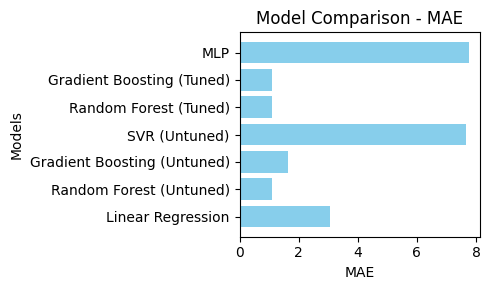

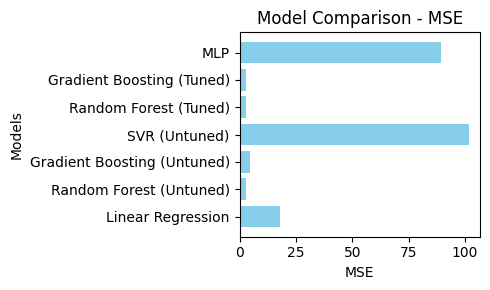

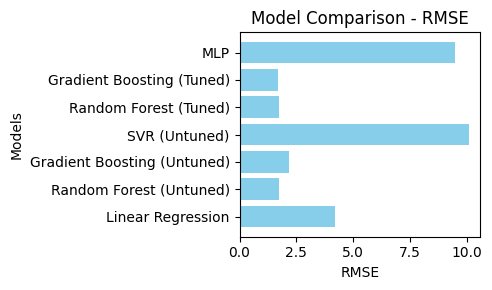

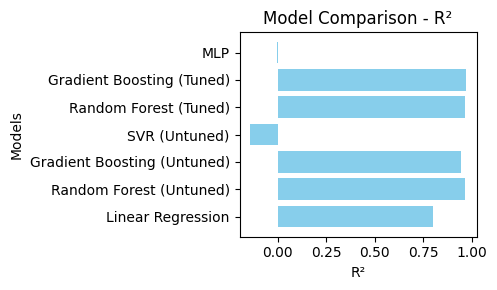

In [91]:
import matplotlib.pyplot as plt

# Plot each metric
metrics = ["MAE", "MSE", "RMSE", "R²"]
for metric in metrics:
    plt.figure(figsize=(5, 3))
    plt.barh(comparison_df.index, comparison_df[metric], color='skyblue')
    plt.title(f"Model Comparison - {metric}")
    plt.xlabel(metric)
    plt.ylabel("Models")
    plt.tight_layout()
    plt.show()


#### **Feature Importance**

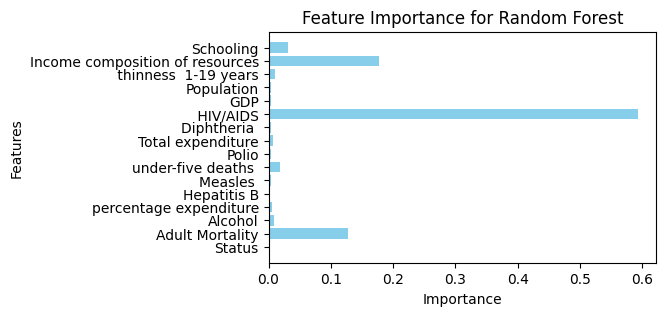

In [92]:
# Feature Importance for Random Forest
rf_importances = best_rf_model.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(features, rf_importances, color='skyblue')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


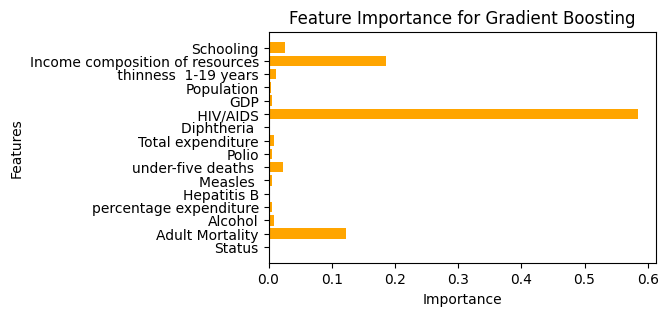

In [93]:
# Feature Importance for Gradient Boosting
gbr_importances = best_gbr_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(features, gbr_importances, color='orange')
plt.title("Feature Importance for Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


#### **Analysis of best performing model**

In [94]:
# Identify the best-performing model based on each metric
best_mae_model = comparison_df['MAE'].idxmin()
best_mse_model = comparison_df['MSE'].idxmin()
best_rmse_model = comparison_df['RMSE'].idxmin()
best_r2_model = comparison_df['R²'].idxmax()

# Print the best-performing models
print("Best Model by MAE:", best_mae_model)
print("Best Model by MSE:", best_mse_model)
print("Best Model by RMSE:", best_rmse_model)
print("Best Model by R²:", best_r2_model)

# Highlight the overall best model (combine criteria)
# Calculate a "score" for overall best (lower is better for errors, higher is better for R²)
comparison_df['Score'] = (comparison_df['MAE'] + comparison_df['RMSE']) - comparison_df['R²']
best_overall_model = comparison_df['Score'].idxmin()

print("\nOverall Best Model Based on Combined Metrics:", best_overall_model)


Best Model by MAE: Gradient Boosting (Tuned)
Best Model by MSE: Gradient Boosting (Tuned)
Best Model by RMSE: Gradient Boosting (Tuned)
Best Model by R²: Gradient Boosting (Tuned)

Overall Best Model Based on Combined Metrics: Gradient Boosting (Tuned)
